# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/train.p'
validation_file= 'C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/valid.p'
testing_file = 'C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/test.p'
labelnames_file = 'C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

labelnames = np.genfromtxt(labelnames_file, skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

X_train_rgb, y_train = train['features'], train['labels']
X_valid_rgb, y_valid = valid['features'], valid['labels']
X_test_rgb, y_test = test['features'], test['labels']
print("Image Shape: {}".format(X_train_rgb[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train_rgb)))
print("Validation Set: {} samples".format(len(X_valid_rgb)))
print("Test Set:       {} samples".format(len(X_test_rgb)))
print(y_train)
total_data_set = np.concatenate((X_train_rgb, X_valid_rgb), axis=0)
total_label_set = np.concatenate((y_train,y_valid), axis=0)
print("Total Set:   {} samples".format(len(total_data_set)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
[41 41 41 ..., 25 25 25]
Total Set:   39209 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_rgb)

# TODO: Number of validation examples
n_valid = len(X_valid_rgb)

# TODO: Number of testing examples.
n_test = len(X_test_rgb)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_rgb[0].shape

# TODO: How many unique classes/labels there are in the dataset.
all_labels=np.unique(np.concatenate((y_test,y_train,y_valid)))
n_classes = len(all_labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt

def visualiseimages(X_img, y_lbl, n_images_show=10, cmap='rgb'):
    n_images=len(X_img)
    fig = plt.figure()
    for i in range(n_images_show):
        rndm=np.random.randint(1,n_images)
        a=fig.add_subplot(1,n_images_show,i+1)
        if cmap=='gray':
            image=X_img[rndm].squeeze()
            plt.imshow(image,cmap)
        else:
            image=X_img[rndm].squeeze()
            plt.imshow(image)
        a.set_title(str(y_lbl[rndm])+"-"+labelnames[y_lbl[rndm]][1].decode('ascii')+'\n'+str(rndm))
    fig.set_size_inches(np.array(fig.get_size_inches())*2)
    plt.show()

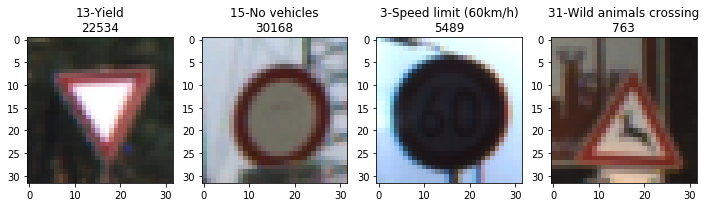

In [4]:
# Prints 5 random images from X_train
visualiseimages(X_train_rgb,y_train,4)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

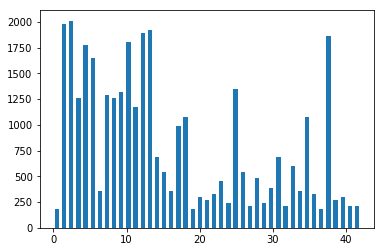

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
[  0.           0.97674419   1.95348837   2.93023256   3.90697674
   4.88372093   5.86046512   6.8372093    7.81395349   8.79069767
   9.76744186  10.74418605  11.72093023  12.69767442  13.6744186
  14.65116279  15.62790698  16.60465116  17.58139535  18.55813953
  19.53488372  20.51162791  21.48837209  22.46511628  23.44186047
  24.41860465  25.39534884  26.37209302  27.34883721  28.3255814
  29.30232558  30.27906977  31.25581395  32.23255814  33.20930233
  34.18604651  35.1627907   36.13953488  37.11627907  38.09302326
  39.06976744  40.04651163  41.02325581  42.        ]


In [5]:
# How many types of labels are available
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(hist)
print(bins)

# Data set redistribution
- Based on results from 17Feb2018 run6, and above histogram, I felt that the label data in the later regions (20-40) is not represented as well in the training set as the first region (0-20). 
- So I concatenated all the data as per the cell below and used the tensorflow dataset splitter to see what label distribution I get.

In [6]:
#from sklearn.model_selection import train_test_split
#total_data_set, total_label_set = shuffle(total_data_set, total_label_set)
#X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
#    total_data_set,
#    total_label_set,
#    test_size=0.12,
#    random_state=832289)
#
#print('Training features and labels randomized and split.')
#print("New Training Set:   {} samples".format(len(X_train_split)))
#print("New Validation Set: {} samples".format(len(X_valid_split)))

In [7]:
# How many types of labels are available
#hist, bins = np.histogram(y_train_split, bins=n_classes)
#width = 0.6 * (bins[1] - bins[0])
#center = (bins[:-1] + bins[1:]) / 2
#plt.bar(center, hist, align='center', width=width)
#plt.show()
#print(np.average(np.bincount(y_train_split)))
#print("minimum samples for any label:", min(np.bincount(y_train_split)))

# Plan to make the training data more representative in all classes.
As the average number of samples per class(y_train) are 802, I decided that each class that has number of samples less than 800 need to be concatenated with some data to make it more representative. What kind of data to concatenate? :
No point concatenating the same kind of data. So I will experiment with pasting the same data set as the class but only slightly modifying the images - shift the image a few pixels, add a gaussian blurr, darken/brighten image. Do one of these randomly. (Thats the theory)


In [8]:
# Brighten an image
import matplotlib.pyplot as plt
import cv2

#print(X_train_rgb[0].shape)
def brighten(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    value=np.random.randint(10,70)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

#img=brighten(X_train_rgb[0],80)
#print(img.shape)
#imgplot = plt.imshow(img)

In [9]:
# Shift an image
def shifted(img):
    rows,cols,c = img.shape
    bgr=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    pxl=3
    dx,dy = np.random.randint(-pxl,pxl,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(bgr,M,(cols,rows))
    img=cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
    return img
#img=brighten(X_train_rgb[0],80)
#img=shifted(img)
#print(img.shape)
#imgplot = plt.imshow(img)

In [10]:
# Blurr an image
def blurred(img):
    ksize=np.random.randint(1,6)
    kernel = np.ones((ksize,ksize),np.float32)/(ksize*ksize)
    dst = cv2.filter2D(img,-1,kernel)
    return dst
#img=brighten(X_train_rgb[0],80)
#img=blurred(img,3)
#print(img.shape)
#imgplot = plt.imshow(img)

In [11]:
X_train_bin=X_train_rgb[y_train==41]
print(X_train_bin.shape)
print(y_train)
aa=[1, 2, 3]
bb=[4, 5, 6]
cc=np.hstack((aa,bb))
print(cc)

(210, 32, 32, 3)
[41 41 41 ..., 25 25 25]
[1 2 3 4 5 6]


[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Data normalised


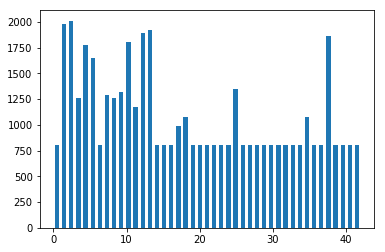

[ 800 1980 2010 1260 1770 1650  800 1290 1260 1320 1800 1170 1890 1920  800
  800  800  990 1080  800  800  800  800  800  800 1350  800  800  800  800
  800  800  800  800  800 1080  800  800 1860  800  800  800  800]


In [12]:
#from IPython.core.debugger import set_trace
import copy

hist, bins = np.histogram(y_train, bins=n_classes)
print(hist)
bin_less_than_800=[]
for i in range(len(hist)):
    if hist[i]<800:
        bin_less_than_800.append(i)
bin_less_than_800=np.asarray(bin_less_than_800)
#print('bin_less_than_800:', bin_less_than_800)
#print('X_train_rgb.shape', X_train_rgb.shape)
y_train_orig=copy.deepcopy(y_train)
X_train_rgb_orig=copy.deepcopy(X_train_rgb)

for i in range(len(bin_less_than_800)):
    X_train_bin=copy.deepcopy(X_train_rgb_orig[y_train_orig==bin_less_than_800[i]])
    #print('bin_less_than_800:', bin_less_than_800[i], ' X_train_bin:', X_train_bin.shape)
    n_images_inbin = len(X_train_bin)
    n_images_add = 800 - n_images_inbin
    #print('n_images_add:', n_images_add)
    X_train_temp=copy.deepcopy(X_train_rgb[0:n_images_add])
    y_train_temp=copy.deepcopy(y_train[0:n_images_add])
    #print(X_train_temp.shape)
    #print(y_train_temp.shape)
    k=0
    #set_trace()
    for j in range(n_images_add):
        #rndm=np.random.randint(0,high=n_images_inbin-1,size=None)
        whattodo=np.random.randint(1,high=3,size=None)
        if whattodo==1:
            new_image=shifted(brighten(X_train_bin[k]))
            #print("brightened")
        if whattodo==2:
            new_image=blurred(shifted(X_train_bin[k]))
            #print("shifted")
        if whattodo==3:
            new_image=brighten(blurred(X_train_bin[k]))
            #print("blurred")
        X_train_temp[j]=new_image
        y_train_temp[j]=bin_less_than_800[i]
        k=k+1
        if k==n_images_inbin-1:
            k=0
    #set_trace()
    X_train_rgb=np.concatenate((X_train_rgb, X_train_temp), axis=0)
    y_train=np.hstack((y_train, y_train_temp))
    X_train_temp=[]
    y_train_temp=[]
    
    #print(X_train_rgb.shape)
    #print(y_train.shape)

print("Data normalised")
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(hist)

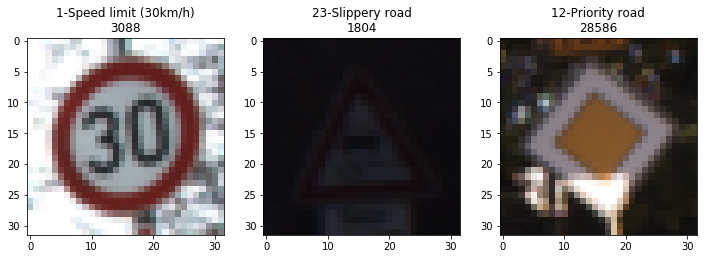

In [13]:
visualiseimages(X_train_rgb,y_train,3)

In [14]:
# Convert to grayscale
X_train_gray = np.sum(X_train_rgb/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test_rgb/3, axis=3, keepdims=True)
X_valid_gray= np.sum(X_valid_rgb/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gray.shape)



RGB shape: (46480, 32, 32, 3)
Grayscale shape: (46480, 32, 32, 1)


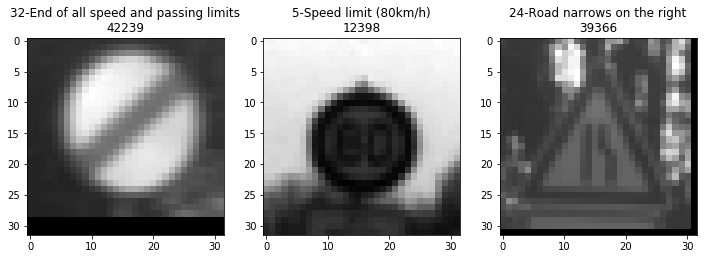

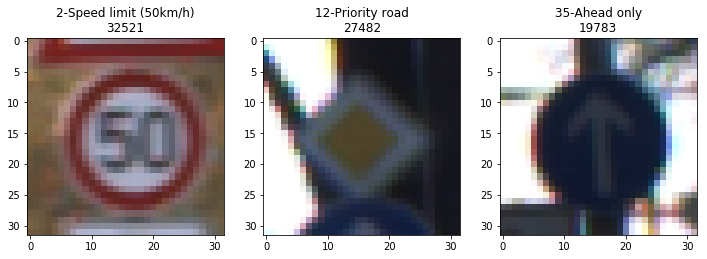

In [15]:
# Visualize 
visualiseimages(X_train_gray,y_train,3,'gray')
visualiseimages(X_train_rgb,y_train,3)

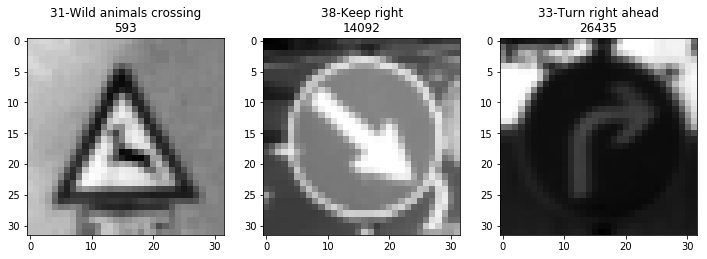

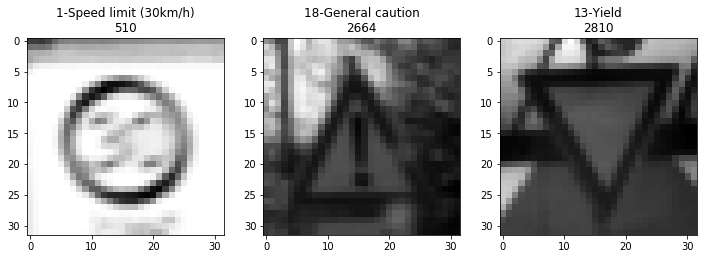

84.9865327661


In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train = copy.deepcopy(X_train_gray)
X_valid = copy.deepcopy(X_valid_gray)

# Visualize normalised images ..... again
visualiseimages(X_train,y_train,3,'gray')
visualiseimages(X_valid,y_valid,3,'gray')
print(np.mean(X_train))

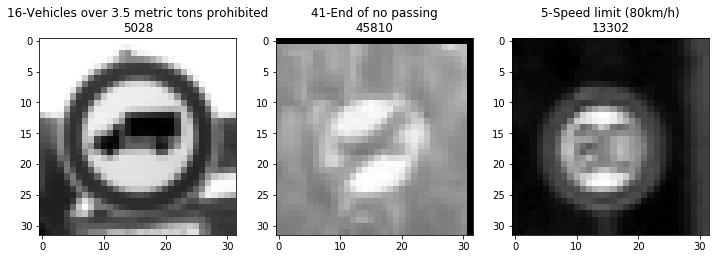

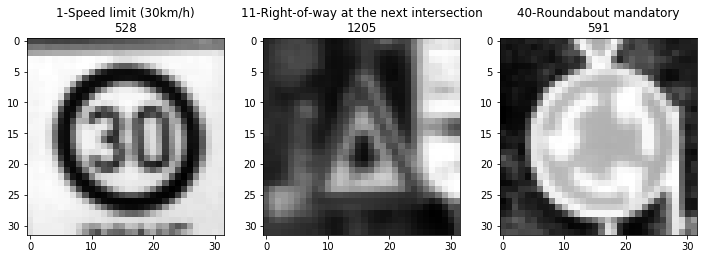

In [17]:
## Normalize the train and test datasets to (-1,1)

X_train_normal = (X_train - 128)/128 
X_valid_normal = (X_valid - 128)/128
#print("Normalised")
#print("Original:", X_train.shape)
#print("Normalised:", X_train_normal.shape)
visualiseimages(X_train_normal,y_train,3,'gray')
visualiseimages(X_valid_normal,y_valid,3,'gray')
#print('X_train_normalised')
#print(X_train_normal[0])
#print('X_train')
#print(X_train[0])
X_train=X_train_normal
X_valid=X_valid_normal


### Model Architecture

### LeNet Layer

In [18]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 100

In [19]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

# References used while modifying LeNet:
- http://www.cs.toronto.edu/~guerzhoy/321/lec/W06/convnets.pdf
    This paper has interesting information on concatenations.
- http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
    Difficult paper to read!!!
- 

In [20]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    conv2_flat   = flatten(conv2)

    
    # SOLUTION: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Flatten. Input = 1x1x400. Output = 400.
    conv3_flat   = flatten(conv3)
    
    # Concatenate conv2_flat(400) and conv3_flat(400). Output = 800.
    conv2_3_flat = tf.concat_v2([conv2_flat, conv3_flat],1)
    
    # Dropout layer
    fc0=tf.nn.dropout(conv2_3_flat, keep_prob)
    #fc0=tf.nn.dropout(conv3_flat, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    return fc1

In [21]:
## Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [22]:
## Training pipeline
rate = 0.0009

#logits = LeNet(x)
logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
## Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 30
BATCH_SIZE = 80
print(X_train.shape)
print(X_valid.shape)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        #print("EPOCH {} ...".format(i+1))
        print(str(i)+": Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()
        
    saver.save(sess, './lenet')
    print("Model saved")

(46480, 32, 32, 1)
(4410, 32, 32, 1)
Training...

0: Validation Accuracy = 0.882
1: Validation Accuracy = 0.928
2: Validation Accuracy = 0.946
3: Validation Accuracy = 0.955
4: Validation Accuracy = 0.955
5: Validation Accuracy = 0.965
6: Validation Accuracy = 0.960
7: Validation Accuracy = 0.963
8: Validation Accuracy = 0.960
9: Validation Accuracy = 0.967
10: Validation Accuracy = 0.965
11: Validation Accuracy = 0.965
12: Validation Accuracy = 0.970
13: Validation Accuracy = 0.963
14: Validation Accuracy = 0.966
15: Validation Accuracy = 0.968
16: Validation Accuracy = 0.968
17: Validation Accuracy = 0.966
18: Validation Accuracy = 0.969
19: Validation Accuracy = 0.965
20: Validation Accuracy = 0.966
21: Validation Accuracy = 0.971
22: Validation Accuracy = 0.964
23: Validation Accuracy = 0.968
24: Validation Accuracy = 0.969
25: Validation Accuracy = 0.969
26: Validation Accuracy = 0.969
27: Validation Accuracy = 0.966
28: Validation Accuracy = 0.967
29: Validation Accuracy = 0.967


# Progress Report
17Feb2018: (Ran on local laptop - AWS not approved yet)
    1. Run1: basic LeNet architecture based on class lectures. 
       Initially images without any preprocessing were given for testing. 
       After 10 epochs, only 87.9% accuracy.
    2. Run2: Only change from run1 is train images are converted to gray. 
       Accuracy only improved to 88%.
    3. Run3: Run2+Normalisation. Accuracy: 91%
    4. Run4: Run2+Normalisation+training rate changed to 0.009.
       Accuracy dropped: 89.2% and changing rate back to 0.001 did not 
       improve accuracy all the way, only up to 88.3%.
    5. Run5: Run3+Epochs=30. No substantial increase in accuracy: 92%.
    6. Run6: LeNet2 created with additional conv layer 3 and a 
       concatenated layer containing conv2_flat and conv3_flat. This 
       increased accuracy to 94.8%.

19Feb2018: (Ran on local laptop - AWS not approved yet - so slow :(
    1. After noticing underrepresentation of some classes in the provided training
       data, completed writing the code block to add randomly modified images or the 
       same class to the bin of that class. All underrepresented data sets bumped upto
       800
    2. Run1: observed that the accuracy of model jumps quickly to 94% by epoch 5 but 
       after that it plateaus and stays at 94%. 
    3. Run2: Reduced training rate to 0.0009. Result same as Run1
       94.2%
    4. Run3: Changed the image preprocessing to include more random steps. No difference
    5. Run4: Added random blurring/brightening/shifting parameters to the image pre-processors
       95.9%
    6. Run5: Changed dropout to 0.7 (from 0.5). Goes up to 94% in epoch 2 and stays there.
    7. Run6: Set epochs 50 and Reduced batch size to 100 : no change!!! 95%
    8. Run7: Epochs: 20, Dropout: 0.5, Batch:100, rate: 0.0009: 96.7%
    9. Run8: Epochs: 20, Dropout: 0.5, Batch:100, rate: 0.0005: 94.6%
    10. Run9: Epochs: 20, Dropout: 0.5, Batch:100, rate: 0.001: 96.6%
    11. Run10: Epochs: 20, Dropout: 0.5, Batch:160, rate: 0.00097: 92.9%
    12. Run11: Epochs: 20, Dropout: 0.5, Batch:80, rate: 0.0011: 96.9%
    13. Run12: Epochs: 20, Dropout: 0.5, Batch:60, rate: 0.0001: 94.6% (no plateauing - now increasing the epochs)
    14. Run13: Epochs: 40, Dropout: 0.5, Batch:60, rate: 0.0001: 94.0% - Plateau after 11 epochs
    15. Run14: Epochs: 40, Dropout: 0.5, Batch:90, rate: 0.0011: 95.6% - plateau after 15 epochs
    16. Run15: Epochs: 40, Dropout: 0.5, Batch:90, rate: 0.0005: 96.6% - plateau after 10 epochs
    17. Run15: Epochs: 15, Dropout: 0.45, Batch:90, rate: 0.0005: 94.5%
    18. Run16: Epochs: 15, Dropout: 0.45, Batch:90, rate: 0.001: 96.6%
    19. Run16: Epochs: 15, Dropout: 0.60, Batch:90, rate: 0.001: 96.1%
    20. Run16: Epochs: 20, Dropout: 0.50, Batch:80, rate: 0.003: 95.8%
    21. Run17: Epochs: 60, Dropout: 0.50, Batch:80, rate: 0.00004: 92%
    22. Run18: Epochs: 60, Dropout: 0.50, Batch:80, rate: 0.0011: 95% - Increased randomness in 
        image modifications - reached 97.2% in epoch 30.
    23. Run19: Epochs: 60, Dropout: 0.50, Batch:80, rate: 0.0011: 95% - removed the concat of
        conv2/3 in LeNet2 function - no change 95%
In the interest of time, decided to use Run18 with epoch set to 30 to do the test.

In [26]:
print(X_test_rgb.shape)
X_test_normal = (X_test_gray - 128)/128
print(X_test_normal.shape)

(12630, 32, 32, 3)
(12630, 32, 32, 1)


In [27]:
## Evaluate model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normal, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


# First run: 94.5% - first run
# Second run: 94.4% - variability is due to random nature of image augmentation.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [3]:
#Adding these again as notebook was closed after being saved at the end of step 2

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import tensorflow as tf

(8, 32, 32, 1)


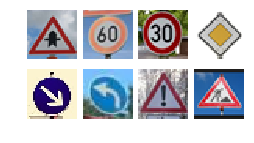

In [4]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Source for code: https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python

from PIL import Image
import glob
image_list = []


fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, filename in enumerate(glob.glob('C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/ImagesFromInternet/*.png')):
    im=cv2.imread(filename)
    image_list.append(im)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

image_list = np.asarray(image_list)
image_list_gray = np.sum(image_list/3, axis=3, keepdims=True)
image_list_normal = (image_list_gray - 128)/128 

print(image_list_normal.shape)


In [5]:
for i, filename in enumerate(glob.glob('C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/ImagesFromInternet/temp/*.jpeg')): 
    im=cv2.imread(filename)
    resized_img = cv2.resize(im, (32, 32))
    cv2.imwrite(filename+"32X32"+ ".jpg", resized_img)
    

In [6]:
for i, filename in enumerate(glob.glob('C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/ImagesFromInternet/temp/100.jpg')):
    print(filename)
    im=cv2.imread(filename)
    resized_img = cv2.resize(im, (32, 32))
    cv2.imwrite(filename+"32X32"+ ".jpg", resized_img)
    

C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/ImagesFromInternet/temp/100.jpg


### Predict the Sign Type for Each Image

In [7]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
labels_list = [11,3,1,12,38,34,18,25]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(image_list_normal, labels_list)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

NameError: name 'evaluate' is not defined

In [2]:
#New set of images
#print(image_list)
image_list = []


fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, filename in enumerate(glob.glob('C:/Users/omkar.karve/CarND-Traffic-Sign-Classifier-Project/Dataset/ImagesFromInternet/temp/32x32/*.jpg')):
    im=cv2.imread(filename)
    print(filename)
    image_list.append(im)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

image_list = np.asarray(image_list)
image_list_gray = np.sum(image_list/3, axis=3, keepdims=True)
image_list_normal = (image_list_gray - 128)/128 

print(image_list_normal.shape)


NameError: name 'plt' is not defined

In [56]:
labels_list = [1,25,7,7,14,4,14,35]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(image_list_normal, labels_list)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.750


### Analyze Performance

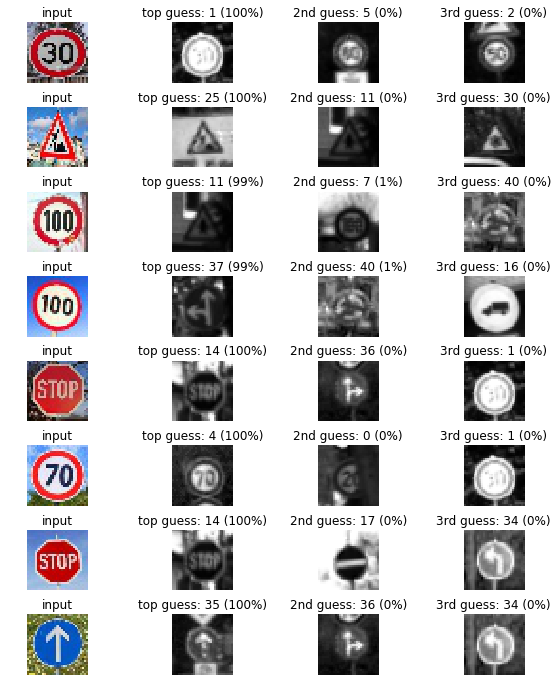

In [57]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    new_softmax_logits = sess.run(softmax_logits, feed_dict={x: image_list_normal, keep_prob: 1.0})
    new_top_k = sess.run(top_k, feed_dict={x: image_list_normal, keep_prob: 1.0})

    fig, axs = plt.subplots(len(image_list),4, figsize=(10, 12))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(image_list):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess_top = new_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess_top)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess_top, 100*new_top_k[0][i][0]))
        guess2 = new_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*new_top_k[0][i][1]))
        guess3 = new_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*new_top_k[0][i][2]))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [77]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    image_input = np.asarray(image_input)
    image_input_gray = np.sum(image_input/3, axis=3, keepdims=True)
    image_input_normal = (image_list_gray - 128)/128 
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input_normal})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [1]:
print(image_list[0].shape)
image_input = np.asarray(image_list[0])
print(image_input.shape)
image_input_gray = np.sum(image_input/3, axis=2, keepdims=True)
image_input_normal = (image_list_gray - 128)/128 
print(image_input_normal.shape)
#with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
#    act2 = tf.get_default_graph().get_tensor_by_name("act2:0")   
#    outputFeatureMap(image_input_normal, act2)

NameError: name 'image_list' is not defined